In [1]:
%matplotlib inline

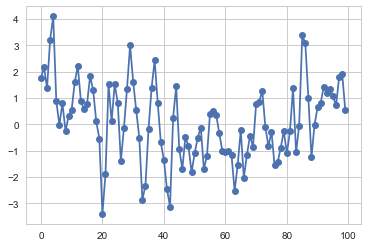

In [2]:
import statsmodels.api as sm
np.random.seed(0)
theta1 = -1
p1 = sm.tsa.ArmaProcess([1], [1, -theta1])
y1 = p1.generate_sample(100)
plt.plot(y1, 'o-')
plt.show()

In [5]:
df

,$Y_t$,$Y_{t-1}$
0,1.764052,2.164210
1,2.164210,1.378895
2,1.378895,3.219631
3,3.219631,4.108451
4,4.108451,0.890280
5,0.890280,-0.027189
6,-0.027189,0.798731
7,0.798731,-0.254576
8,-0.254576,0.307380
9,0.307380,0.554642


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


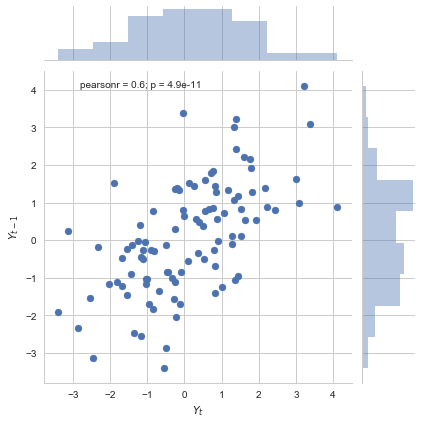

In [4]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()

In [3]:
pinkwink_web = pd.read_csv('data/Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


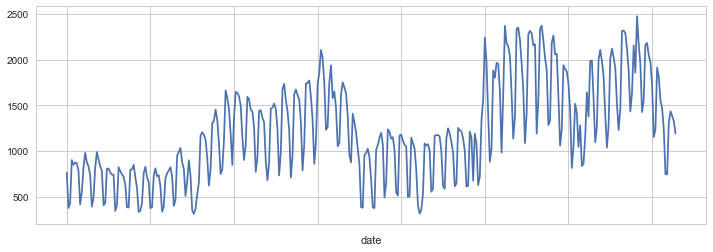

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);


In [5]:
# 365개, 
time = np.arange(0,len(pinkwink_web))
# 0~355 1000개로 쪼개기
fx = np.linspace(0, time[-1], 1000)


traffic = pinkwink_web['hit'].values

In [27]:
def error(f, x, y):
    # 평균에러값
    e = (f(x)-y)**2
    return np.sqrt(np.mean(e))

In [23]:
print(fp1), print(f1)

[  2.94751137 678.39950595]
 
2.948 x + 678.4


(None, None)

In [24]:
print(f2p), print(f2)

[-1.42164283e-03  3.46498936e+00  6.47092087e+02]
           2
-0.001422 x + 3.465 x + 647.1


(None, None)

In [26]:
print(f3p), print(f3)

[ 3.34072153e-05 -1.96619824e-02  6.11714142e+00  5.67195752e+02]
           3           2
3.341e-05 x - 0.01966 x + 6.117 x + 567.2


(None, None)

In [30]:
# x, y, 차수로 y = a * x 다항식을 만들어줌
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

f20p = np.polyfit(time, traffic, 20)
f20 = np.poly1d(f20p)


print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic)) 
print(error(f20, time, traffic))

430.8597308110963
430.62841018946955
429.5328046676293
330.4777307248983
321.8475339659615


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  


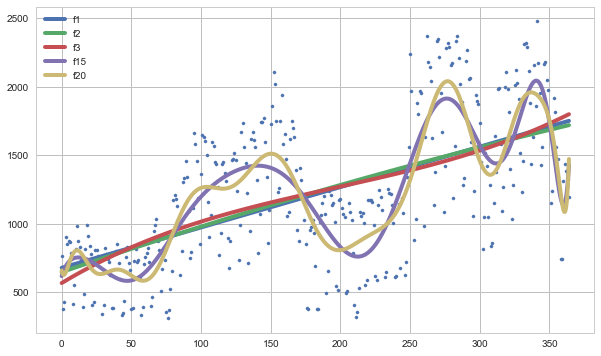

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.plot(fx, f20(fx), lw=4, label='f20')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [34]:
from fbprophet import Prophet

In [39]:
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
16. 7. 6.,876.0
16. 7. 7.,868.0
16. 7. 8.,785.0
16. 7. 9.,417.0


In [53]:
# 날짜와 hit으로 데이터프레임 다시 만듬
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']}).reset_index()
# 데이터 타임 형식으로 변환
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [59]:
#30일 추가
future = m.make_future_dataframe(periods=60)
future

,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05
5,2016-07-06
6,2016-07-07
7,2016-07-08
8,2016-07-09
9,2016-07-10


In [60]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.505060,718.519403,1119.834670
421,2017-08-26,497.439613,302.203854,710.585461
422,2017-08-27,630.021823,407.799386,830.615898
423,2017-08-28,1182.722824,971.735107,1399.566653
424,2017-08-29,1218.649042,998.871009,1431.364869


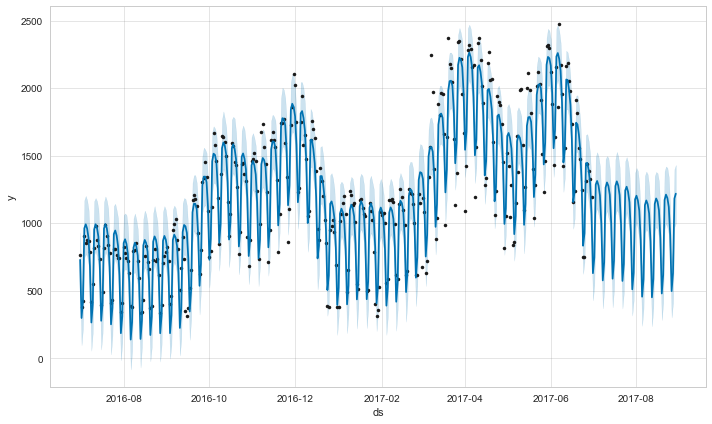

In [61]:

m.plot(forecast);

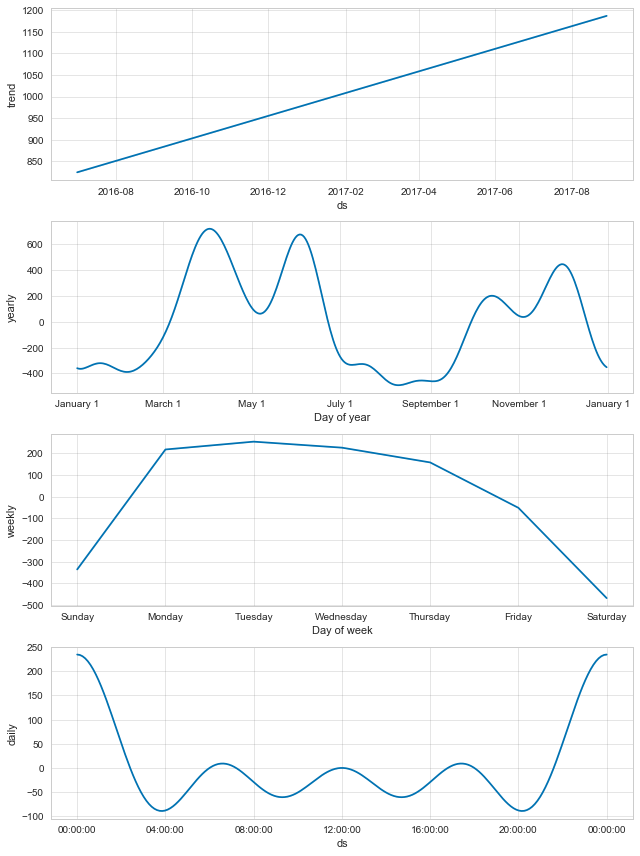

In [62]:
m.plot_components(forecast);

In [92]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.tail()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700


In [98]:
KIA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-26,38800.0,39000.0,38450.0,38650.0,37718.675781,439880
2017-06-27,38550.0,38550.0,37850.0,38000.0,37084.339844,896530
2017-06-28,38000.0,38300.0,37600.0,37850.0,36937.953125,749536
2017-06-29,38000.0,38450.0,37800.0,38150.0,37230.722656,491434
2017-06-30,38050.0,38200.0,37700.0,38200.0,37279.519531,457483


In [94]:
KIA.shape

(4340, 6)

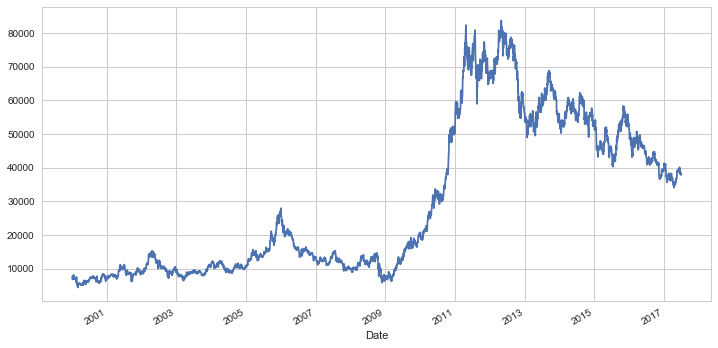

In [93]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [97]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700
2000-01-11,7143.799805,7717.390137,7143.799805,7717.390137,6004.329590,1127200
2000-01-12,7717.390137,8447.410156,7300.229980,7508.810059,5842.046875,1606600
2000-01-13,7696.529785,7696.529785,7195.939941,7195.939941,5598.626953,702700
2000-01-14,7195.939941,7508.810059,6987.359863,7508.810059,5842.046875,843900


In [99]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [101]:
# 모델만들기
m = Prophet(daily_seasonality=True)
m.fit(df);

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [102]:
# 앞으로 1년치
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [105]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35699.306886,26620.214544,43939.916586
4579,2017-12-26,35743.889629,26310.053867,44259.069052
4580,2017-12-27,35712.929531,26757.351601,44415.315335
4581,2017-12-28,35677.765597,26432.821332,43868.837056
4582,2017-12-29,35615.004272,26801.015670,44716.125025


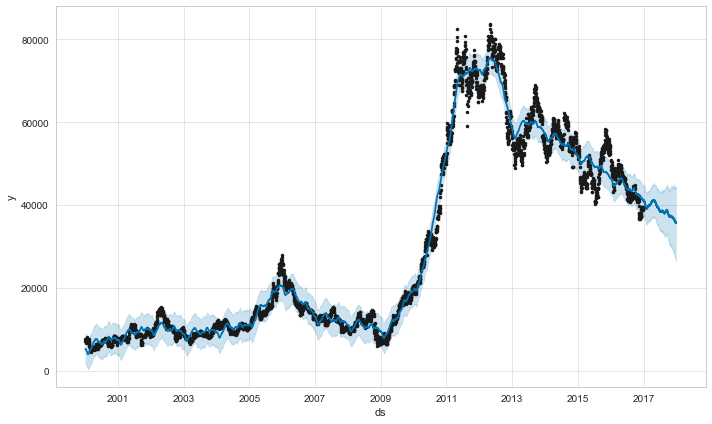

In [108]:
m.plot(forecast);

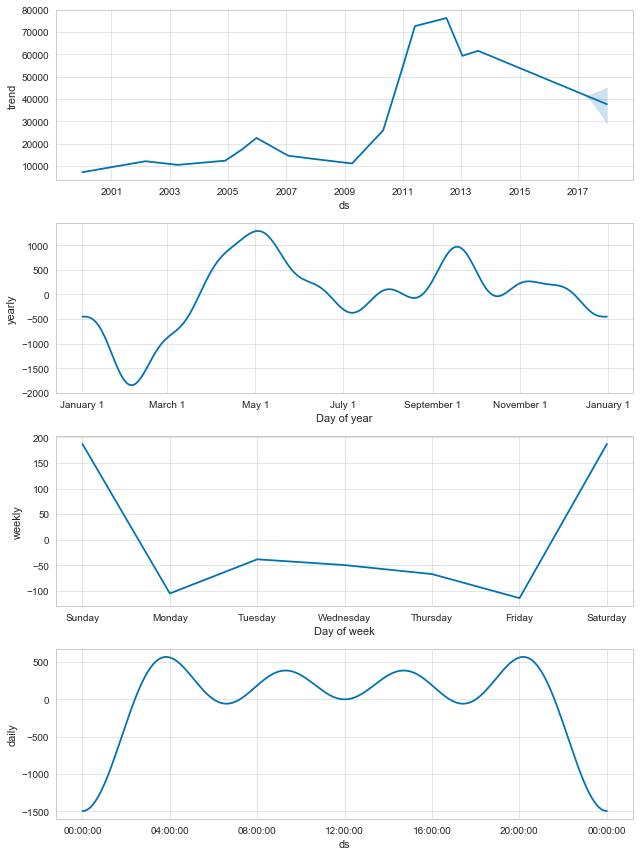

In [109]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


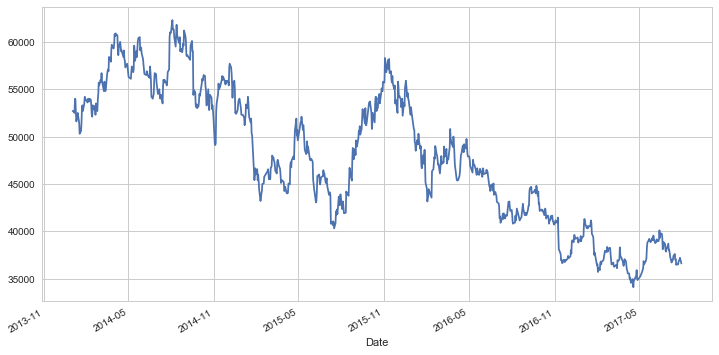

In [110]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

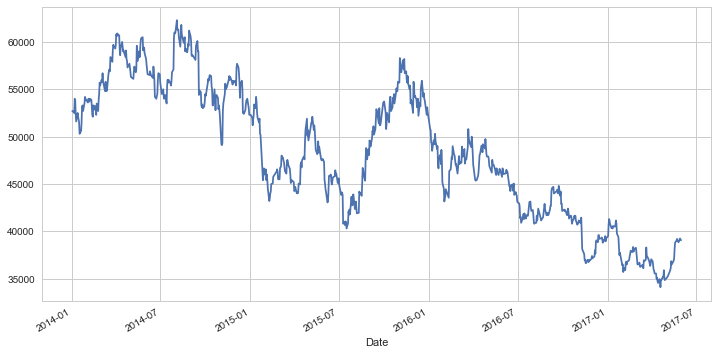

In [112]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [115]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [117]:
m = Prophet(daily_seasonality=True)
m.fit(df);

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [118]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


In [121]:
df.tail()

,ds,y
836,2017-05-25,38950.0
837,2017-05-26,38850.0
838,2017-05-29,39250.0
839,2017-05-30,39150.0
840,2017-05-31,39050.0


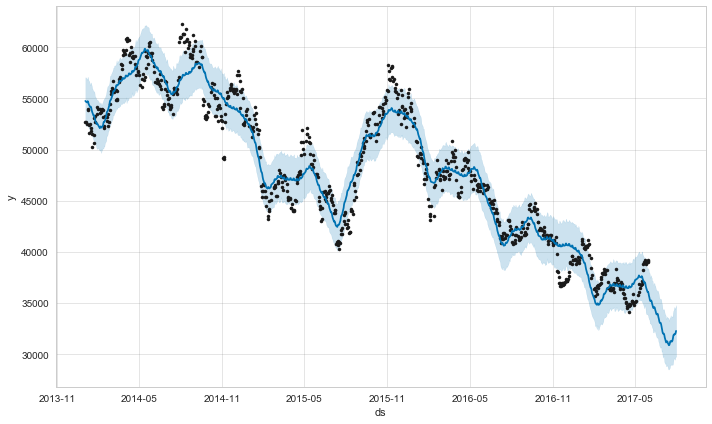

In [119]:
forecast = m.predict(future)
m.plot(forecast);

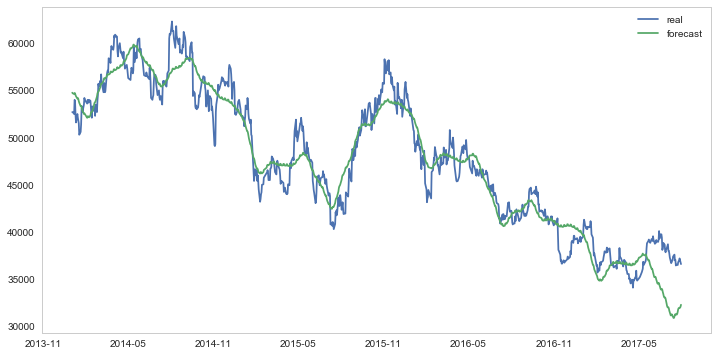

In [120]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()